<a href="https://colab.research.google.com/github/Jithin-Jose-19/Mini-project/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1.Data preprocessing - Resize & Flatten
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []          # used to add the label encoded values of the categories "car" and "motorcycle"
images = []          # used for adding the resized images
flattened_data = []  # used for adding the flattened images

DATADIR = "/content/drive/MyDrive/SmartKnower Internship Practice/Minor Project/images"
CATEGORIES = ["car","motorcycle"]

for category in CATEGORIES : 

  class_num = CATEGORIES.index(category) # label encoding the values present in CATEGORIES
  path = os.path.join(DATADIR,category)  # creating the path to use all the images in the directory

  for img in os.listdir(path) :

    img_arr = imread(os.path.join(path,img))
    img_arr_resized = resize(img_arr,(150,150,3))  # Normalized the values from 0 to 1 because of calling resize()
    images.append(img_arr_resized)
    flattened_data.append(img_arr_resized.flatten())
    target.append(class_num)

# converting all the lists to numpy array   
flattened_data = np.array(flattened_data)
target = np.array(target)
images = np.array(images)

[0 1] [50 50]


<BarContainer object of 2 artists>

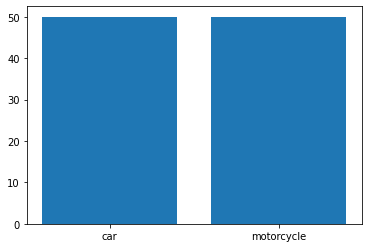

In [2]:
# plotting the bar graph
unique,count = np.unique(target,return_counts=True)
print(unique,count)

plt.bar(CATEGORIES,count)

In [3]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flattened_data,target,test_size=0.2,random_state=47)

# NOTE : Here we don't need to normalize the values since the it is already normalized after calling resize()

In [4]:
# Fitting the model and testing the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Predicted :",y_pred)
print("Real      :",y_test)


Predicted : [0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0]
Real      : [0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0]


In [5]:
# Finding the accuracy of the model
from sklearn.metrics import accuracy_score , confusion_matrix
print("Accuracy score :", accuracy_score(y_pred,y_test))
print("Confusion matrix \n", confusion_matrix(y_pred,y_test))

Accuracy score : 0.8
Confusion matrix 
 [[8 3]
 [1 8]]


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



In [7]:
# Save the model using Pickle library
import pickle
pickle.dump(model,open("image_model.p","wb"))  # writing the model to pickle file

In [8]:
model = pickle.load(open("image_model.p","rb"))    # reading the model from the pickle file

Enter the url for the imagehttps://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/carbon-fiber-shelby-mustang-1600685276.jpg
2
(879, 1320, 3)
[0]
PREDICTED OUTPUT : car


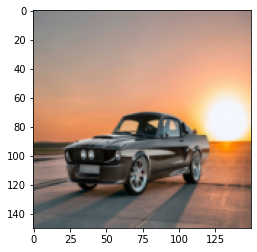

In [10]:
# Testing with a new image
flat_data=[]
url = input("Enter the url for the image")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())

flat_data = np.array(flat_data) 
print(flat_data.ndim)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
print(y_out)
y_out = CATEGORIES[y_out[0]]
print(f"PREDICTED OUTPUT : {y_out}")